## Observations and Insights 

In [88]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview
mouse_metadata.head()
# study_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [89]:
# Checking the number of mice.
mice_count = mouse_metadata['Mouse ID'].count()
mice_count

249

In [90]:
#merge the dataframes
merge_df = pd.merge(mouse_metadata, study_results, how='outer')


# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# study_results_no_dup = study_results.drop_duplicates('Mouse ID')
# study_results_no_dup.count()
merge_df_clean = merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

grouped_df = merge_df_clean.groupby("Mouse ID")
# Optional: Get all the data for the duplicate mouse ID. 

merge_df_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [91]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [92]:
# Checking the number of mice in the clean DataFrame.

mouse_count_cleaned_df = len(merge_df_clean["Mouse ID"].unique())
mouse_count_cleaned_df

249

## Summary Statistics

In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


regimen = merge_df_clean.groupby(["Drug Regimen"])


#find the mean tumor volume
regimen_mean = regimen["Tumor Volume (mm3)"].mean()

#find the median tumor volume
regimen_median = regimen["Tumor Volume (mm3)"].median()

#find the variance of the tumor volume
regimen_variance = regimen["Tumor Volume (mm3)"].var()

#find the standard deviation of the tumor volume
regimen_std = regimen["Tumor Volume (mm3)"].std()

#find the standard error of mean for the tumor volume
regimen_sem = regimen["Tumor Volume (mm3)"].sem()
#create summary DF
summary_statistics = pd.DataFrame({"Mean Tumor Size": regimen_mean, "Median Tumor Size":regimen_median, "Variance of Tumor Size":regimen_variance, "Standard Deviation of Tumor Size": regimen_std, "Standard Error of Mean for Tumor Sizes": regimen_sem})
summary_statistics


,Mean Tumor Size,Median Tumor Size,Variance of Tumor Size,Standard Deviation of Tumor Size,Standard Error of Mean for Tumor Sizes
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

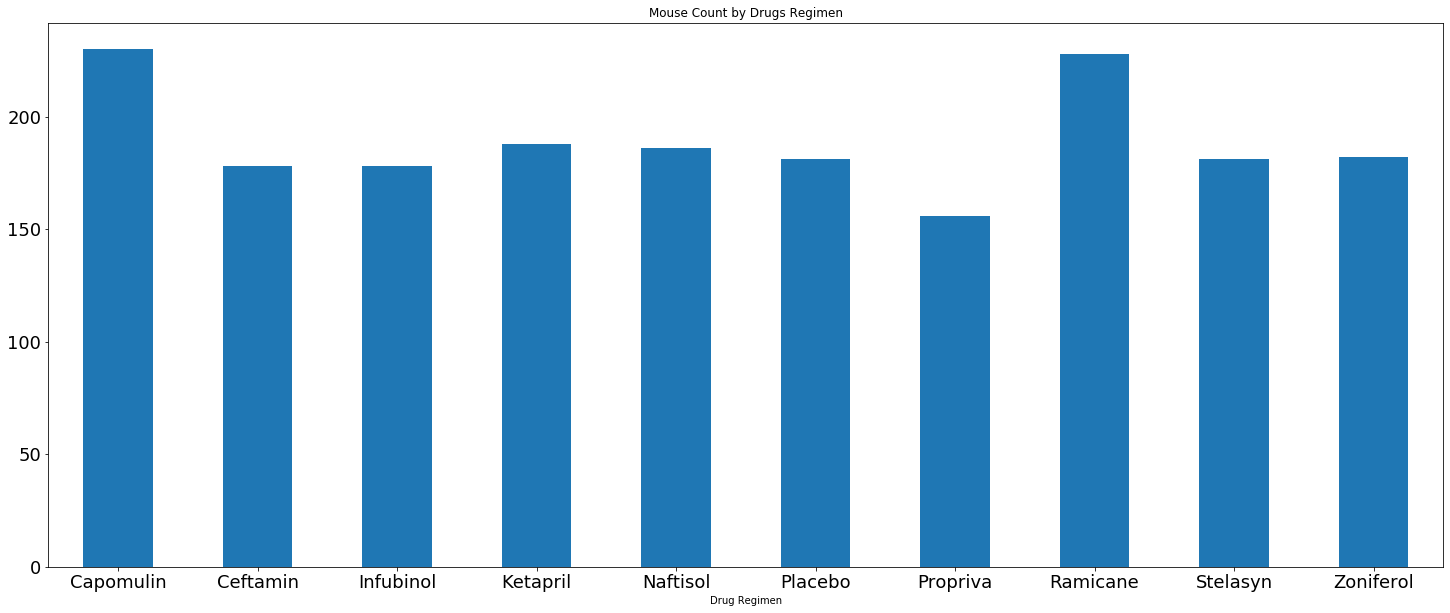

In [98]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_graph_pandas = merge_df_clean.groupby("Drug Regimen").count()['Mouse ID'].plot(kind = 'bar', figsize = (25,10), title = "Mouse Count by Drugs Regimen", rot = 0, fontsize=18)

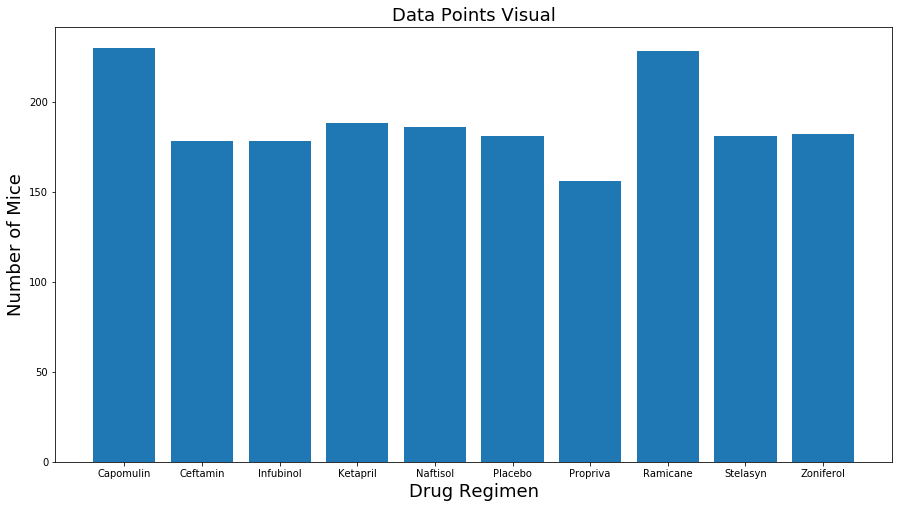

In [99]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_count_data = merge_df_clean.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_count_data = mouse_count_data.to_frame()
mouse_count_data
# #Create an arraw with the datapoints
# y_axis = mouse_count_data["Mouse ID"]

# #Set the x_axis to be the amount of the Data Regimen
# x_axis = np.arange(len(regimen_data_points))

plt.figure(figsize=(15,8))

mouse_drugs_graph = plt.bar(mouse_count_data.index, mouse_count_data["Mouse ID"])

#set chart title

plt.title("Data Points Visual", fontsize=18)
plt.xlabel("Drug Regimen", fontsize=18)
plt.ylabel("Number of Mice", fontsize=18)


#show chart and set layout
plt.show()



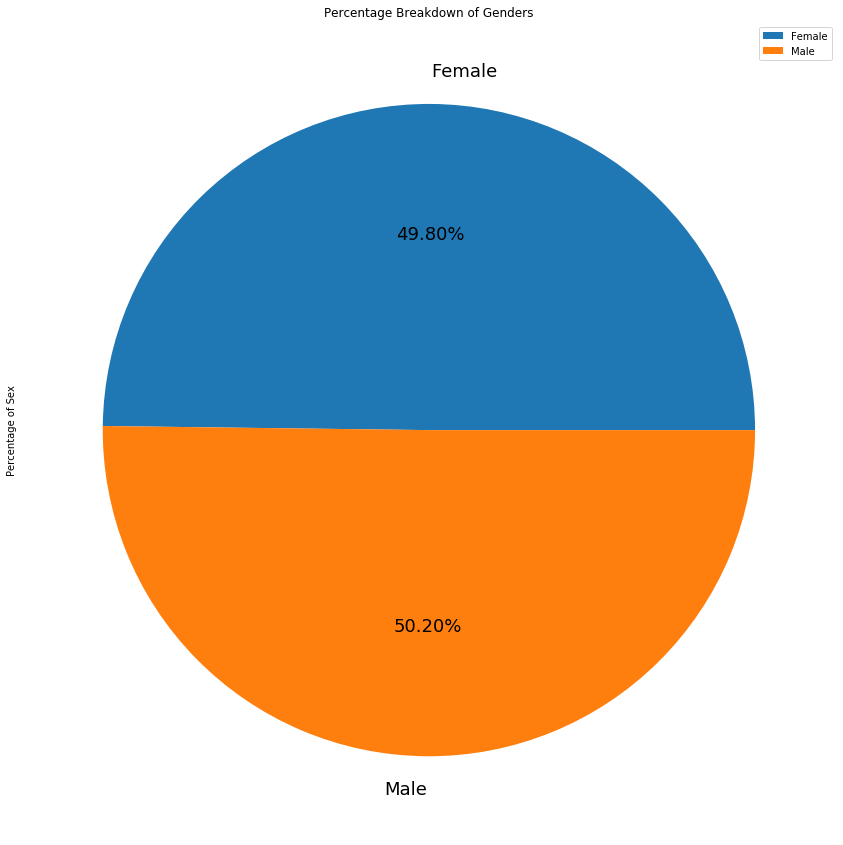

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
mouse_gender = merge_df_clean.groupby(["Mouse ID","Sex"])
mouse_gender

mouse_gender_df = pd.DataFrame(mouse_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender_count = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender_count.columns = ["Total Count"]

#create and format the percentage of female vs male
mouse_gender_count["Percentage of Sex"] = round(100*(mouse_gender_count["Total Count"]/mouse_gender_count["Total Count"].sum()), 2 )

#format the "Percentage of Sex" column
mouse_gender_count["Percentage of Sex"] = mouse_gender_count["Percentage of Sex"]

#gender_df
mouse_gender_count

gender_list=()

panda_pie = mouse_gender_count.plot(y="Percentage of Sex", kind = 'pie', figsize=(20,15), title="Percentage Breakdown of Genders", rot = 0, fontsize=18, autopct= '%1.2f%%')


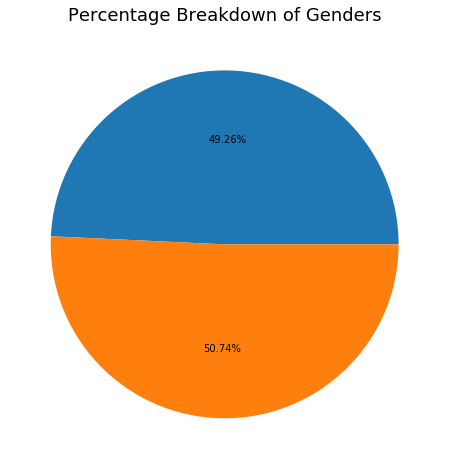

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mouse_gender = merge_df_clean.groupby(["Sex"]).count()['Mouse ID']
type(mouse_gender) 




plt.figure(figsize=(15,8))

mouse_gender = plt.pie(mouse_gender, autopct='%1.2f%%')

#set chart title
plt.title("Percentage Breakdown of Genders", fontsize=18)
plt
#show chart and set layout
plt.show()
# plt.tight_layout()



## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#find final tumor volume for each mouse and the drug regimen
final_tumor_volume = merge_df_clean.groupby(['Mouse ID', 'Drug Regimen']).last()['Tumor Volume (mm3)']

final_tumor_volume_list=final_tumor_volume.tolist

final_tumor_volume.reset_index
final_tumor_volume

Mouse ID  Drug Regimen
a203      Infubinol       67.973419
a251      Infubinol       65.525743
a262      Placebo         70.717621
a275      Ceftamin        62.999356
a366      Stelasyn        63.440686
                            ...    
z435      Propriva        48.710661
z578      Ramicane        30.638696
z581      Infubinol       62.754451
z795      Naftisol        65.741070
z969      Naftisol        73.867845
Name: Tumor Volume (mm3), Length: 249, dtype: float64

In [152]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

tumor_size = []
# Create empty list to fill with tumor vol data (for plotting)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = round(final_tumor_volume.quantile([.25,.5,.75]), 2)

#Quartile analysis


lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round(upperq-lowerq,2)

print(f"The lower quartile of tumor sizes is: {lowerq}mm3")
print(f"The upper quartile of tumor sizes is: {upperq}mm3")
print(f"The interquartile range of tumor sizes is: {iqr}mm3")
print(f"The the median of tumor sizes is: {quartiles[0.5]}mm3 ")
print(f"Tumor Sizes below {lower_bound}mm3 could be outliers.")
print(f"Tumor Sizes above {upper_bound}mm3 could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lower_bound = round(lowerq-(1.5*iqr),2)
upper_bound = round(upperq+(1.5*iqr),2)
tumor_outlier = final_tumor_volume.loc[(final_tumor_volume_list < lower_bound) | (final_tumor_volume.list > upper_bound)]


The lower quartile of tumor sizes is: 45.93mm3
The upper quartile of tumor sizes is: 64.96mm3
The interquartile range of tumor sizes is: 19.03mm3
The the median of tumor sizes is: 55.84mm3 
Tumor Sizes below 17.38mm3 could be outliers.
Tumor Sizes above 93.5mm3 could be outliers.


TypeError: '>' not supported between instances of 'float' and 'method'

In [165]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = final_tumor_volume.sort_values(['Drug Regimen'])

fig1, ax1 = plt.subplots()
ax1.set_title('test')
ax1.set_ylabel('test1')
ax1.boxplot(final_tumor_volume)
plt.show

TypeError: unhashable type: 'list'

## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
